In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset from Keras

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step 
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# Normalize pixel values to range [0, 1]

In [3]:
X_train = X_train / 255.0                                       # Scale training images
X_test = X_test / 255.0                                         # Scale test images

# Build the model

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),             # Flatten 28x28 images to 784
    tf.keras.layers.Dense(128, activation='relu'),             # Hidden layer with 128 ReLU units
    tf.keras.layers.Dense(10, activation='softmax')            # Output layer for 10 classes
])

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Compile the model

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model

In [6]:
model.fit(X_train, y_train, epochs=10, validation_split=0.1, verbose=1)  # Include validation split

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7758 - loss: 0.6362 - val_accuracy: 0.8543 - val_loss: 0.3958
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8597 - loss: 0.3901 - val_accuracy: 0.8547 - val_loss: 0.3927
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8747 - loss: 0.3428 - val_accuracy: 0.8690 - val_loss: 0.3651
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8838 - loss: 0.3164 - val_accuracy: 0.8678 - val_loss: 0.3582
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8913 - loss: 0.2973 - val_accuracy: 0.8758 - val_loss: 0.3478
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8958 - loss: 0.2774 - val_accuracy: 0.8843 - val_loss: 0.3311
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9016 - loss: 0.2654 - val_accuracy: 0.8852 - val_loss: 0.3242
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9052 - loss: 0.2558 - 

# Evaluate on test data

In [7]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.2f}")

Test Accuracy: 0.88


# Optional: Display sample predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


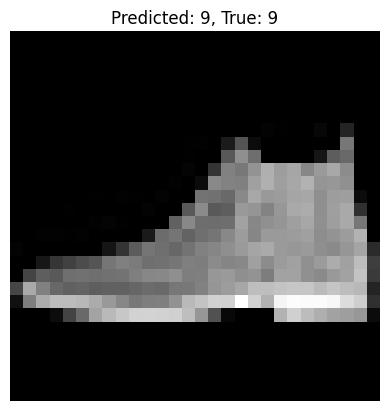

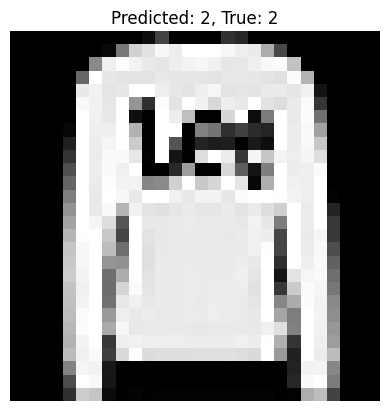

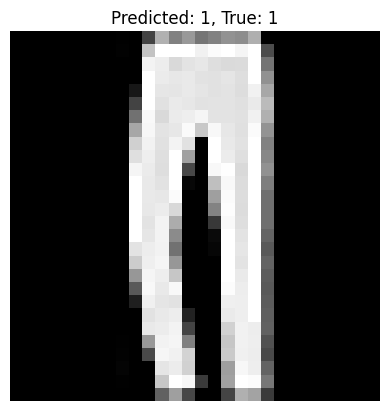

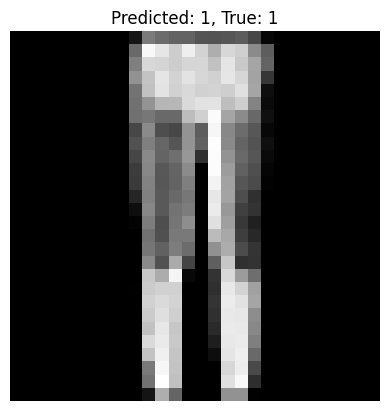

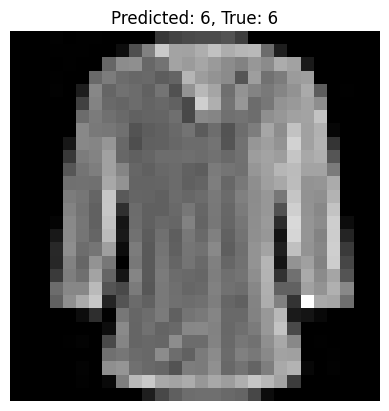

In [8]:
preds = model.predict(X_test[:5])                            # Predict on first 5 test images
for i, pred in enumerate(preds):
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Predicted: {pred.argmax()}, True: {y_test[i]}")
    plt.axis('off')
    plt.show()